# Выборка #13

In [1]:
%run init.py
%load_ext autoreload
%autoreload 2

### Обзор данных

In [2]:
dataset = Dataset(13)
dataset.summary()

+---------+-----------------------+----------------------+-------------+------------------+
| Выборка | Обучающая, # объектов | Тестовая, # объектов | # признаков | Доля класса 1, % |
+---------+-----------------------+----------------------+-------------+------------------+
|    13   |          1000         |        10000         |      10     |       18.0       |
+---------+-----------------------+----------------------+-------------+------------------+


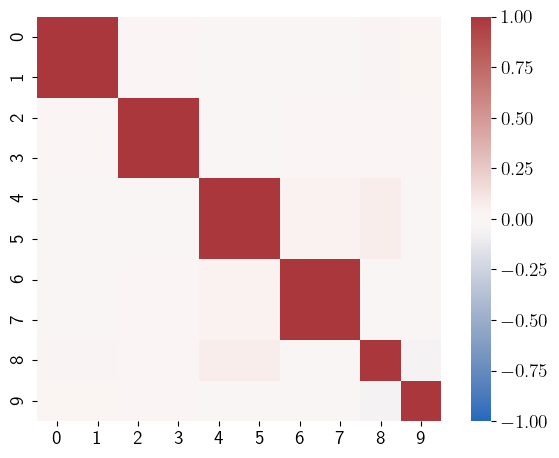

In [3]:
dataset.heatmap()

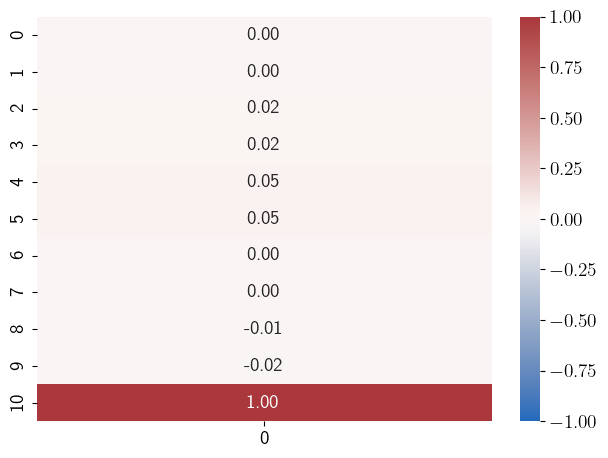

In [4]:
dataset.target_corr()

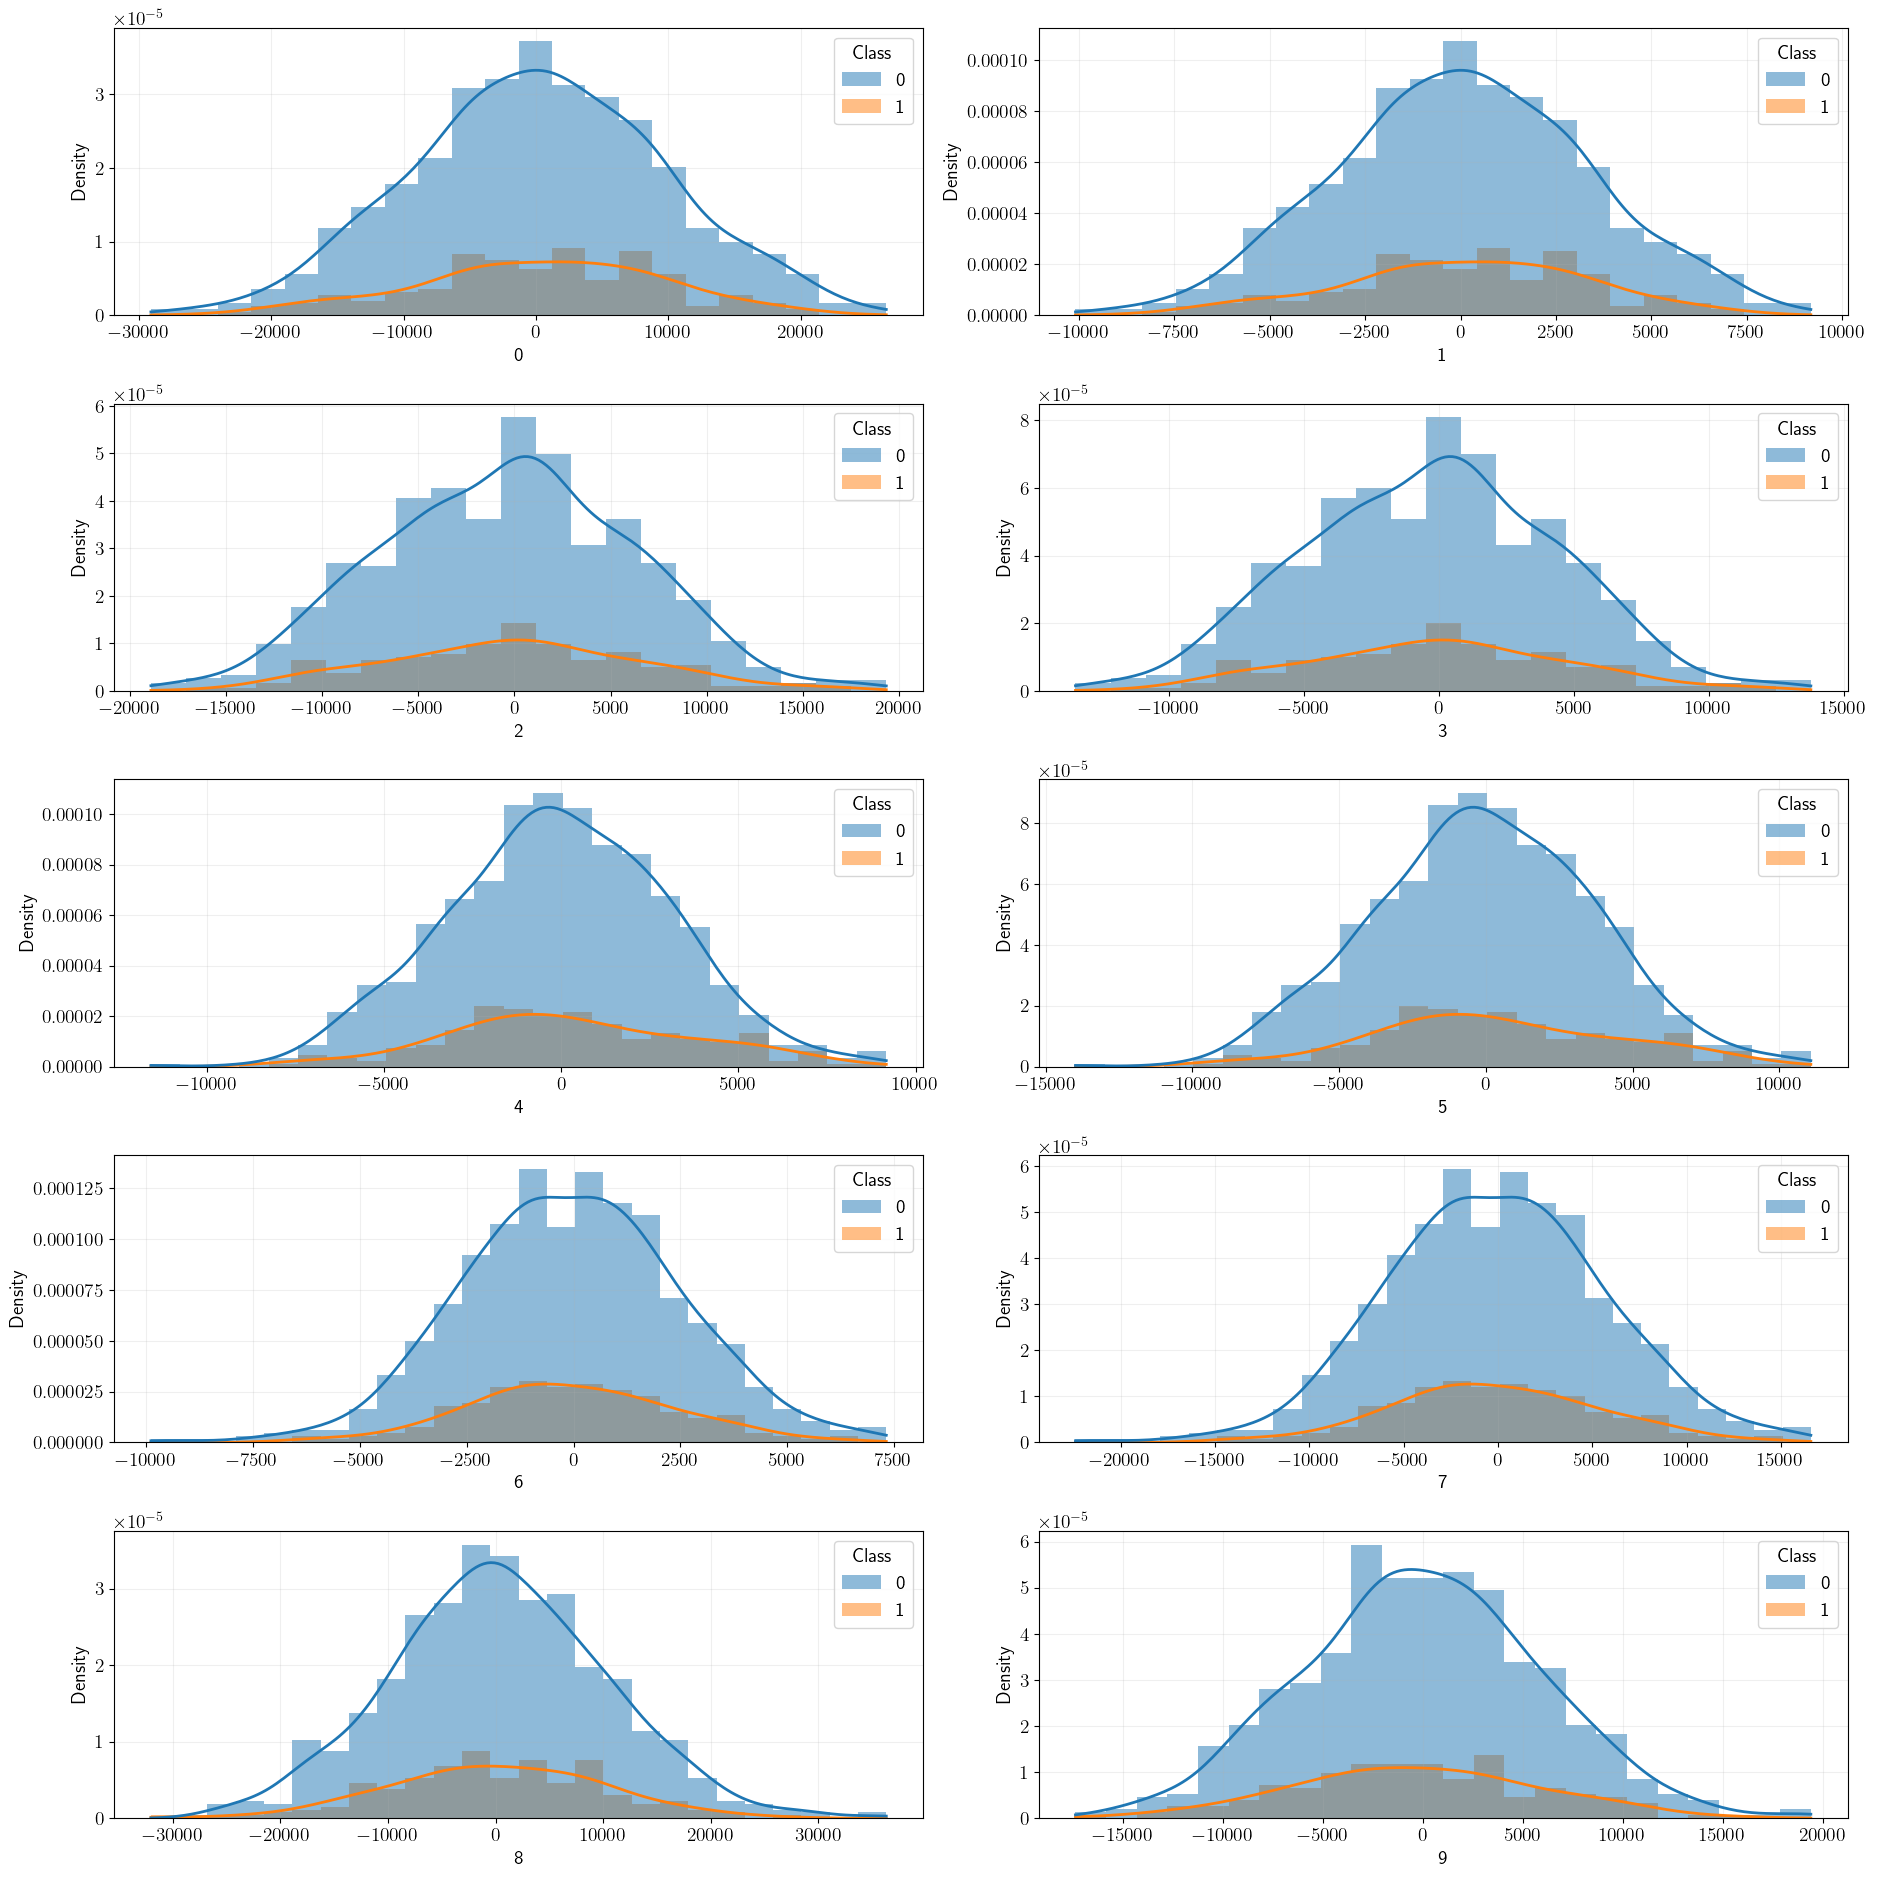

In [5]:
make_histplot(dataset.df)

### Проверка нормальности признаков

Используем критерий Шапиро-Уилка

In [6]:
pvals = [shapiro(dataset.X1[i])[1] for i in range(dataset.n_features)]

Получим достигаемые уровни значимости для нулевой гипотезы: "Распределение признака является нормальным"

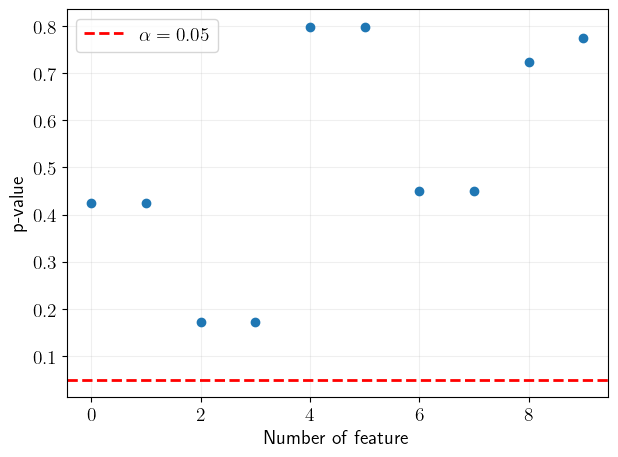

In [7]:
plt.plot(pvals, linestyle='None', marker='o')
plt.axhline(y=0.05, color='r', linestyle='dashed', label=r'$\alpha=0.05$')

plt.legend()
plt.xlabel('Number of feature')
plt.ylabel('p-value')
plt.grid(alpha=0.2)

plt.tight_layout()
plt.show()

### Logistic Regression

100%|██████████| 10/10 [00:00<00:00, 33.38it/s]


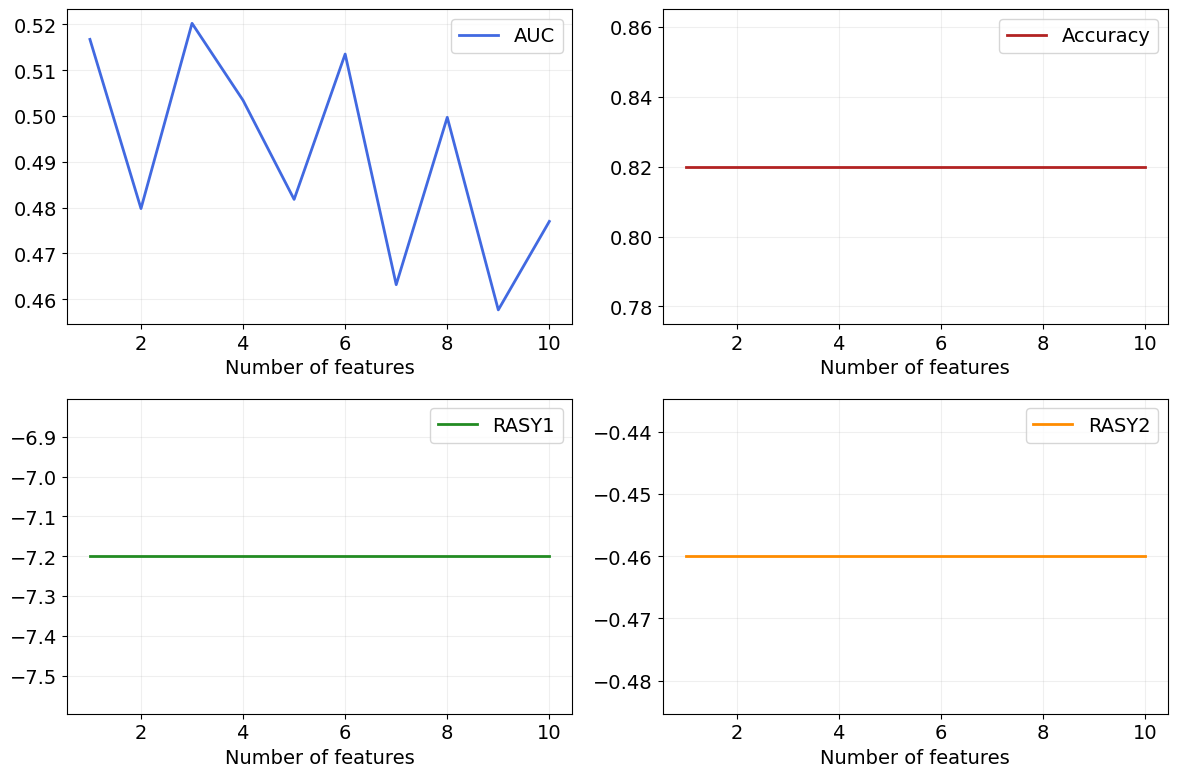

In [6]:
dataset.metrics_n_features_dependence(LogisticRegression(), 
                                      ks=None)

In [9]:
features_lr, cols_lr = dataset.feature_selection(n_cols=3)

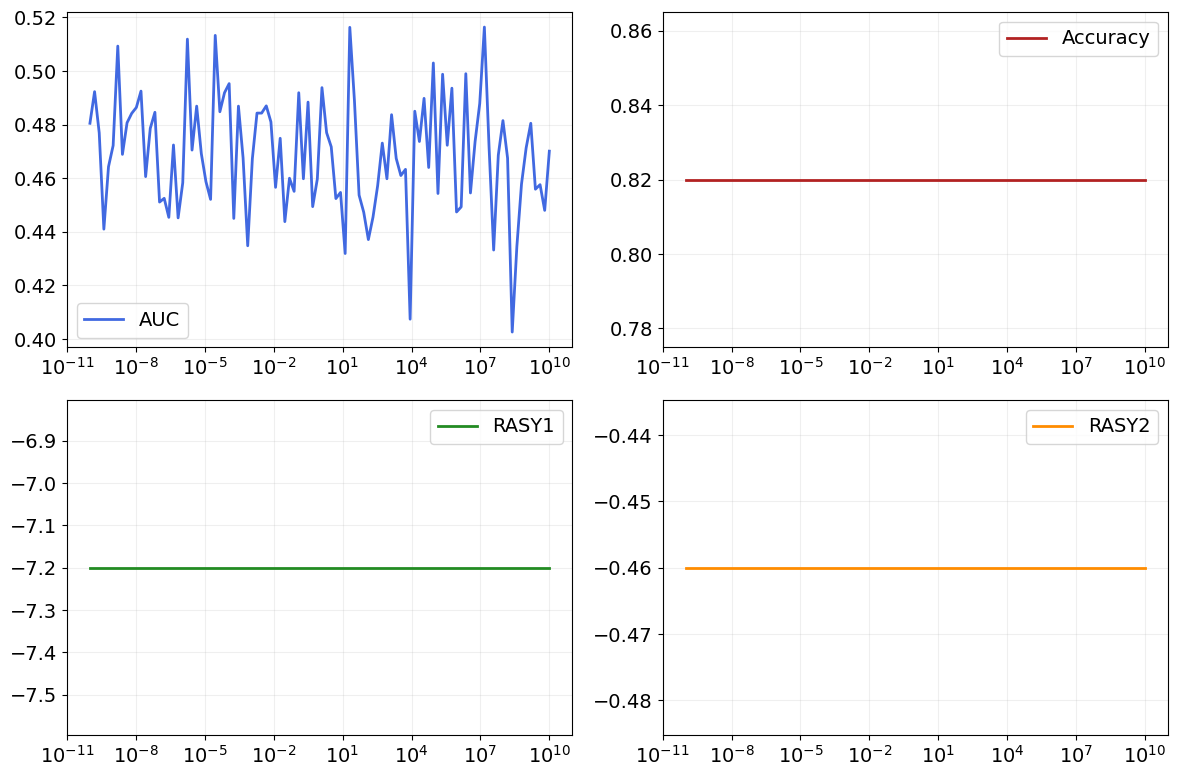

In [8]:
Cs = np.logspace(-10, 10, 100)
LogisticRegressionValidate(dataset, features_lr, Cs)

### Наивный байес

100%|██████████| 10/10 [00:00<00:00, 42.96it/s]


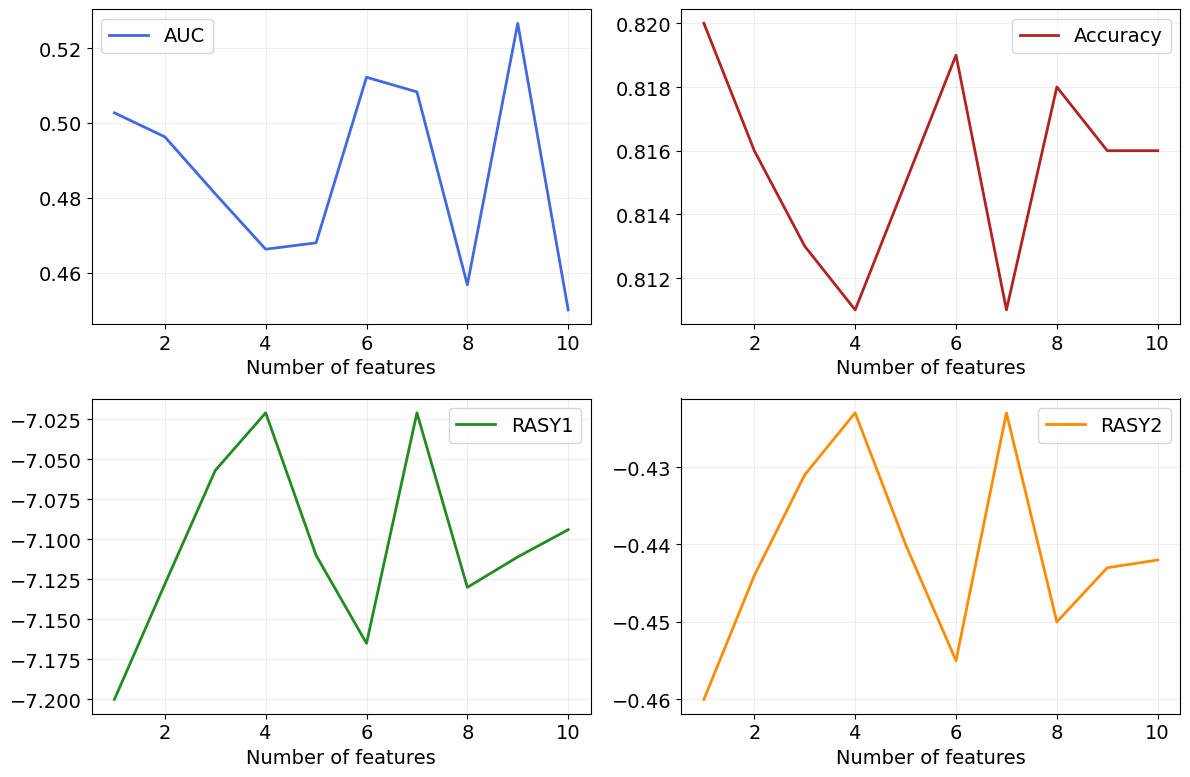

In [10]:
dataset.metrics_n_features_dependence(GaussianNB(),
                                      ks=None)

In [7]:
features_bayes, cols_bayes = dataset.feature_selection(n_cols=9)

### CatBoost

In [11]:
fit_params = {"verbose" : False, "plot" : False}

100%|██████████| 10/10 [01:10<00:00,  7.05s/it]


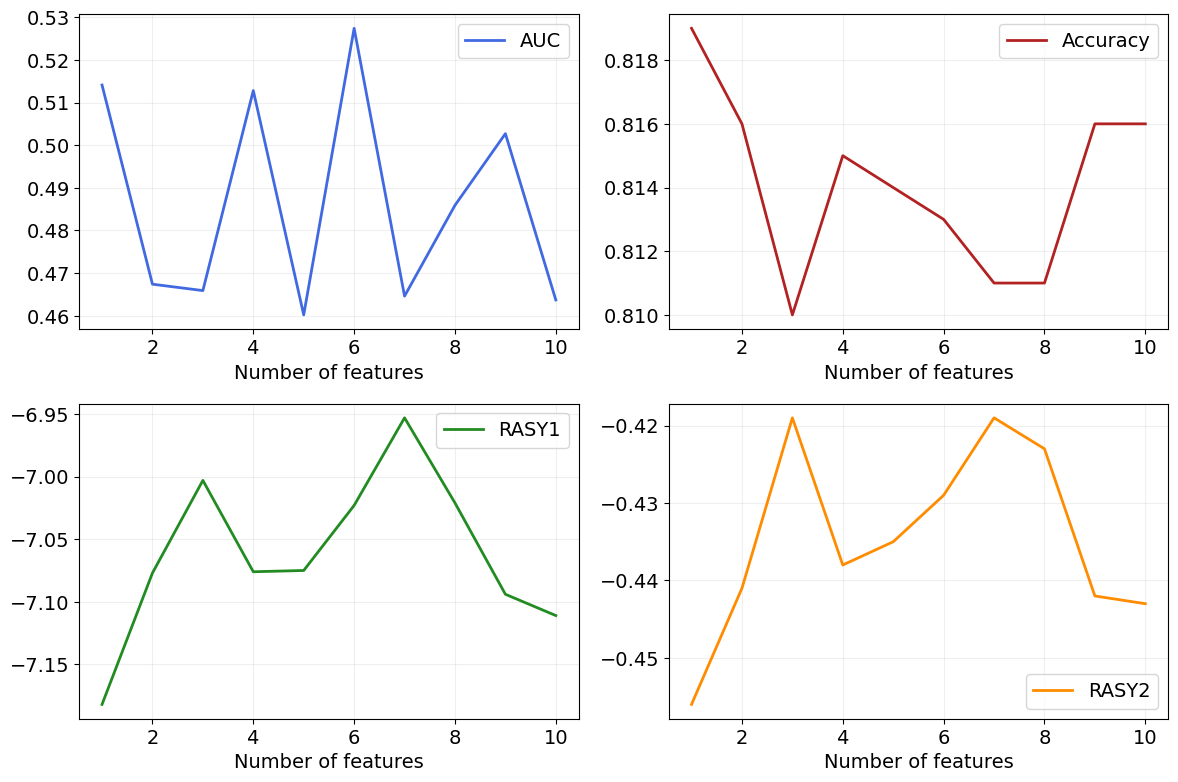

In [12]:
dataset.metrics_n_features_dependence(CatBoostClassifier(), fit_params=fit_params,
                                      ks=None)

In [13]:
features_cb, cols_cb = dataset.feature_selection(n_cols=19)

In [16]:
depths = [2, 3, 4, 5, 6, 7]
CatBoostClassifierValidate(dataset, features_cb, depths)

KeyboardInterrupt: 

### Saving aswers 

In [15]:
model_auc = LogisticRegression(C=1e-5)
model_acc = LogisticRegression(C=1e-5)
model_rasy1 = LogisticRegression(C=1e-5)
model_rasy2 = LogisticRegression(C=1e-5)
models = [model_auc, model_acc, model_rasy1, model_rasy2]

In [16]:
features_auc, cols_auc = features_lr, cols_lr
features_acc, cols_acc = features_lr, cols_lr
features_rasy1, cols_rasy1 = features_lr, cols_lr
features_rasy2, cols_rasy2 = features_lr, cols_lr
features_list = [features_auc, features_acc, features_rasy1, features_rasy2]
cols_list = [cols_auc, cols_acc, cols_rasy1, cols_rasy2]

In [17]:
dataset.save_ans(models, features_list, cols_list)